Window size - number of  of past values we are using  to predict  the  future value

<h3>Loading the libraries <h3>

In [2]:
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:

tf.get_logger().setLevel('ERROR')  # Suppress TensorFlow warnings


In [4]:
dataset =tf.data.Dataset.range(10)  
#for val in dataset:
    #print(val)  
    # type of this val is tensor object, in our case it's scalar
    #print(val.numpy())
    # turning tensor object into numpy array

dataset=dataset.window(5,shift=1, drop_remainder=True)
# now this data  is a window dataset
# windowed dataset ->
'''[  Dataset([0, 1, 2, 3, 4]),
      Dataset([1, 2, 3, 4, 5]),
      Dataset([2, 3, 4, 5, 6]),
      Dataset([3, 4, 5, 6, 7]),
      Dataset([4, 5, 6, 7, 8]),
      Dataset([5, 6, 7, 8, 9])
]
'''
dataset = dataset.flat_map(lambda window: window.batch(5))
# here we are taking each window,
# batching  each windows elements into a tensor object
#Dataset[1,2,3,4,5] -> tensor flow object(1,2,3,4,5)
for val in dataset:
    print(val.numpy())
    #val.numpy() will turn the tensor flow object into numpy array
    





[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


2024-05-23 11:32:34.635970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<h3> Creating   the dataset <h3>

In [5]:
dataset = dataset.map(lambda window: (window[:-1],window[-1]))
for x, y in dataset:
    print(x.numpy(),y.numpy())
 # here we are mapping  window (type tensor object) element into a tuple of 
 #(first 4 elements of the window, last element of  the window)   

[0 1 2 3] 4
[1 2 3 4] 5
[2 3 4 5] 6
[3 4 5 6] 7
[4 5 6 7] 8
[5 6 7 8] 9


2024-05-23 11:32:34.704743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<h3> Shuffling <h3>


In [6]:
dataset =  dataset.shuffle(buffer_size=10)
for x, y in dataset:
    print(x.numpy(),y.numpy())


[2 3 4 5] 6
[4 5 6 7] 8
[1 2 3 4] 5
[5 6 7 8] 9
[3 4 5 6] 7
[0 1 2 3] 4


2024-05-23 11:32:34.755631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<h3> Batching <h3>

In [7]:
dataset= dataset.batch(2).prefetch(1)
for x,y in dataset:
    print("x="  , x.numpy())
    print("y=" ,y.numpy())

x= [[3 4 5 6]
 [1 2 3 4]]
y= [7 5]
x= [[5 6 7 8]
 [4 5 6 7]]
y= [9 8]
x= [[2 3 4 5]
 [0 1 2 3]]
y= [6 4]


2024-05-23 11:32:34.811738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<h3> Combining all together into a function <h3>

In [8]:


def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # creating TensorFlow object from the series
    dataset = tf.data.Dataset.from_tensor_slices(series)
    # creating dataset of windows
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    # turning the dataset of windows into dataset of numpy arrays
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    # shuffling and mapping each window dataset into a tuple of (features, label)
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    # creating batches
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

# Example usage


<h3> Getting the time series data from the other notebook <h3>

In [9]:

# Load the serialized DataFrame from the file
with open('product_df.pkl', 'rb') as f:
    product_df = pickle.load(f)
# Now you can use the product_df variable in this notebook
sales_array =  product_df['Sales'].values
print(sales_array)
print(len(sales_array))
print(product_df)

[   40  3375  3633  1926   801   440   134    52   151   468  3763  2894
  6574  4858  4341  4315  1151   256   165   284   116   434  3417  5518
  7293  4021  2940  1766  1023   166   171    88   551  1531  1893  3743
  8362  6951  4444  1762   784   239   142   179   226  1621  3656  5636
  6737 10197  4197  2850   782   836   275    83   264  1703  6551  5036
  6294 11044  6467  2241   834   172   343   172   384  1021  4889 10620
  4918  8587  4811  3441  2480   683   899    31   190   953  3261  4125
  4762  7630  3304  1008   209    61    74    26    70   610  3898  5538
  9329  3885  2377  1665   568   260   218   111  1057  1831  5700  3532
  6024 12094  2449  1069   182   306   150   180  1220  3019  5958  6809
 12728  9020 10432  3640  2332  1028   501   442   603   825  4326  3580
  4449 12455  2830   462   552   125    42    87   190   798  5486  6048
 14477 15457  8435  3321  1069   870   359   298]
152
            Sales
2010-05-31     40
2010-06-30   3375
2010-07-31   363

<h3> Normalize the data <h3>

In [10]:
scaler = MinMaxScaler()
product_df = scaler.fit_transform(product_df)
print(product_df)

[[9.07264597e-04]
 [2.17030653e-01]
 [2.33750243e-01]
 [1.23128767e-01]
 [5.02235759e-02]
 [2.68291102e-02]
 [6.99889832e-03]
 [1.68491997e-03]
 [8.10057676e-03]
 [2.86436394e-02]
 [2.42174843e-01]
 [1.85859633e-01]
 [4.24340613e-01]
 [3.13135895e-01]
 [2.79631910e-01]
 [2.77946990e-01]
 [7.29051908e-02]
 [1.49050612e-02]
 [9.00784136e-03]
 [1.67195904e-02]
 [5.83241527e-03]
 [2.64402825e-02]
 [2.19752446e-01]
 [3.55906941e-01]
 [4.70935131e-01]
 [2.58894433e-01]
 [1.88840645e-01]
 [1.12760029e-01]
 [6.46102002e-02]
 [9.07264597e-03]
 [9.39666904e-03]
 [4.01788607e-03]
 [3.40224224e-02]
 [9.75309442e-02]
 [1.20990215e-01]
 [2.40878751e-01]
 [5.40211263e-01]
 [4.48771953e-01]
 [2.86306785e-01]
 [1.12500810e-01]
 [4.91218975e-02]
 [1.38033828e-02]
 [7.51733523e-03]
 [9.91510596e-03]
 [1.29609228e-02]
 [1.03363359e-01]
 [2.35240749e-01]
 [3.63553885e-01]
 [4.34903765e-01]
 [6.59127730e-01]
 [2.70300045e-01]
 [1.83008230e-01]
 [4.89922883e-02]
 [5.24917374e-02]
 [1.61363489e-02]
 [3.693863

<h3> Training, Validation and Test split

In [11]:
validation_percentage = 0.1
test_percentage = 0.2
train_percentage = 0.7

length = len(product_df)
# Calculate the end indices for each split
train_end = int(length * train_percentage)
validation_end = int(length * (train_percentage + validation_percentage))

# Slice the array correctly using integer indices
training_df = product_df[:train_end]
validation_df = product_df[train_end:validation_end]
test_df = product_df[validation_end:]
print(training_df)


[[9.07264597e-04]
 [2.17030653e-01]
 [2.33750243e-01]
 [1.23128767e-01]
 [5.02235759e-02]
 [2.68291102e-02]
 [6.99889832e-03]
 [1.68491997e-03]
 [8.10057676e-03]
 [2.86436394e-02]
 [2.42174843e-01]
 [1.85859633e-01]
 [4.24340613e-01]
 [3.13135895e-01]
 [2.79631910e-01]
 [2.77946990e-01]
 [7.29051908e-02]
 [1.49050612e-02]
 [9.00784136e-03]
 [1.67195904e-02]
 [5.83241527e-03]
 [2.64402825e-02]
 [2.19752446e-01]
 [3.55906941e-01]
 [4.70935131e-01]
 [2.58894433e-01]
 [1.88840645e-01]
 [1.12760029e-01]
 [6.46102002e-02]
 [9.07264597e-03]
 [9.39666904e-03]
 [4.01788607e-03]
 [3.40224224e-02]
 [9.75309442e-02]
 [1.20990215e-01]
 [2.40878751e-01]
 [5.40211263e-01]
 [4.48771953e-01]
 [2.86306785e-01]
 [1.12500810e-01]
 [4.91218975e-02]
 [1.38033828e-02]
 [7.51733523e-03]
 [9.91510596e-03]
 [1.29609228e-02]
 [1.03363359e-01]
 [2.35240749e-01]
 [3.63553885e-01]
 [4.34903765e-01]
 [6.59127730e-01]
 [2.70300045e-01]
 [1.83008230e-01]
 [4.89922883e-02]
 [5.24917374e-02]
 [1.61363489e-02]
 [3.693863

<h3> Create windowed dataset <h3>

In [12]:
window_size = 12
batch_size = 2
shuffle_buffer = 1000

# Create a windowed dataset

dataset = windowed_dataset(training_df, window_size, batch_size, shuffle_buffer)


<h3> Define and compile the model <h3>

In [13]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[window_size])
])
# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9))

/Users/parvizpirizade/Documents/stock_price_prediction/time_series_analysis/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h3> Train the model <h3>

Epoch 21: Loss 0.008870664983987808
Epoch 22: Loss 0.010516143403947353
Epoch 23: Loss 0.009476673789322376
Epoch 24: Loss 0.009971820749342442
Epoch 25: Loss 0.010328611359000206


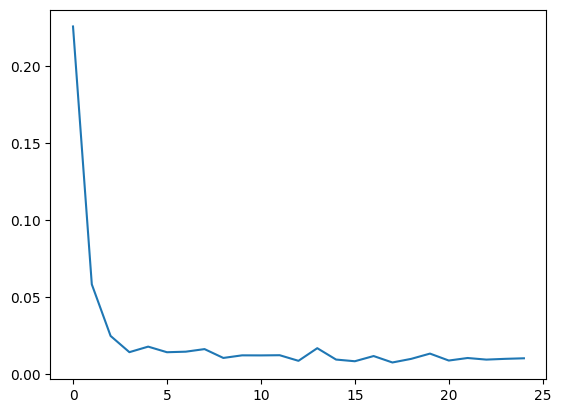

In [14]:
dataset = dataset.repeat()  # Repeat the dataset indefinitely
# Train the model
history = model.fit(dataset, epochs=25, steps_per_epoch=24, verbose=0)
last_epochs_loss = history.history['loss'][-5:]

# Print the loss values for the last 5 epochs
for epoch, loss in enumerate(last_epochs_loss, start=len(history.history['loss']) - 5):
    print(f"Epoch {epoch + 1}: Loss {loss}")

plt.plot(history.history['loss'])



<h3> Create the dataset for predictions <h3>

In [15]:
# Create dataset for predictions
predict_dataset = tf.data.Dataset.from_tensor_slices(training_df)
predict_dataset = predict_dataset.window(window_size, shift=1, drop_remainder=True)
predict_dataset = predict_dataset.flat_map(lambda window: window.batch(window_size))
predict_dataset = predict_dataset.batch(1).prefetch(1)


<h3> Make the predictions on the training dataset <h3>

In [16]:
# Make predictions
predictions = model.predict(predict_dataset)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step


2024-05-23 11:32:36.278141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


<h3> Flatten for plotting <h3>

In [17]:
# Flatten predictions for plotting
rescaled_predictions = predictions.flatten()


<h3> Plot the predictions along with  original training data <h3>

Text(0.5, 0, 'Time')

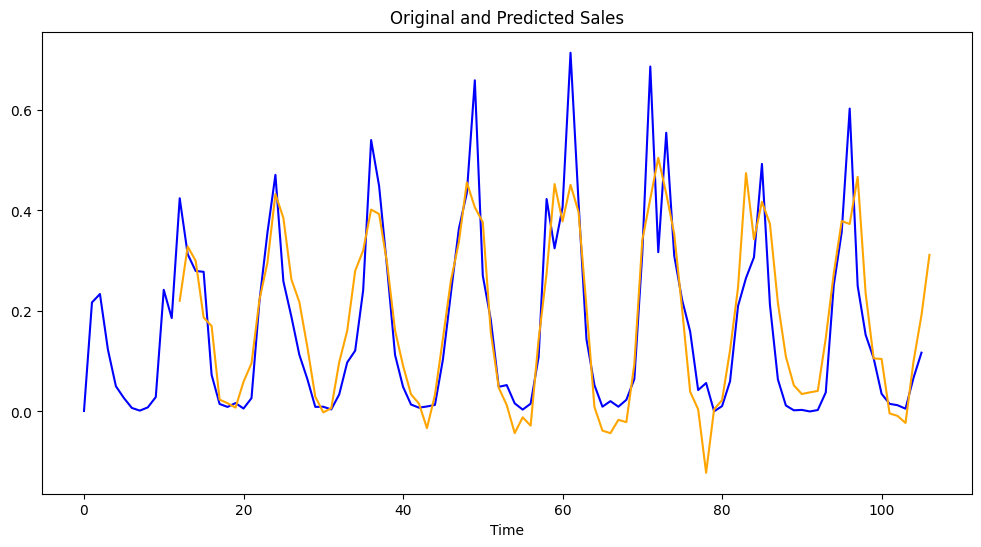

In [18]:
# Plotting
plt.figure(figsize=(12, 6))
# Original data
plt.plot(range(len(training_df)), training_df.flatten(), label='Original Sales', color='blue')
# Predictions (shifted to align with original data)
plt.plot(range(window_size, len(rescaled_predictions) + window_size), rescaled_predictions, label='Predictions', color='orange')
plt.title('Original and Predicted Sales')
plt.xlabel('Time')